# Introduction to neuroimaging data with Python

In this tutorial we will learn how to load, plot, and manipulate neuroimaging data in Python



matplotlib: https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python




Written by Luke Chang

## Nibabel

Neuroimaging data is often stored in the format of nifti files `.nii` which can also be compressed using gzip `.nii.gz`.  These files store both 3D and 4D data and also contain structured metadata in the image **header**.

There is an very nice tool to access nifti data stored on your file system in python called [nibabel](http://nipy.org/nibabel/).  If you don't already have nibabel installed on your computer it is easy via `pip`. First, tell the jupyter cell that you would like to access the unix system outside of the notebook and then install nibabel using pip. You only need to run this once (unless you would like to update the version).

In [1]:
!pip install nibabel

nibabel objects can be initialized by simply pointing to a nifti file even if it is compressed through gzip.  First, we will import the nibabel module as `nib` (short and sweet so that we don't have to type so much when using the tool).  I'm also including a path to where the data file is located so that I don't have to constantly type this.  It is easy to change this on your own computer.

We will be loading an anatomical image from subject S01 from the open localizer [dataset](http://brainomics.cea.fr/localizer/).  See this [paper](https://bmcneurosci.biomedcentral.com/articles/10.1186/1471-2202-8-91) for more information about this dataset.

In [6]:
import os
import nibabel as nib

base_dir = '/dartfs/rc/lab/P/Psych60/'
!pwd


/Users/tom/baic/book/content/labs/lab-Image


In [113]:
# data = nib.load(os.path.join(base_dir, 'data','brainomics_data','S01','normalized_T1_anat_defaced.nii.gz'))
# data = nib.load('./babyface_T1.nii.gz')
mask = nib.load('./mask.nii.gz')
data = nib.load('./preproc_T1w.nii.gz')
# os.stat('./raw_T1_example.nii.gz')

In [117]:
data.get_fdata().shape

(192, 256, 256)

In [118]:
mask.get_fdata().shape

(192, 256, 256)

If we want to get more help on how to work with the nibabel data object we can either consult the [documentation](https://nipy.org/nibabel/tutorials.html#tutorials) or add a `?`.

In [14]:
data?

The imaging data is stored in either a 3D or 4D numpy array. Just like numpy, it is easy to get the dimensions of the data using `shape`

In [108]:
data.shape

(192, 256, 256)

We can also directly access the data and plot a single slice using standard matplotlib functions.

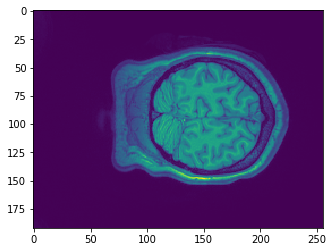

In [142]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_fdata()[:,50,:])

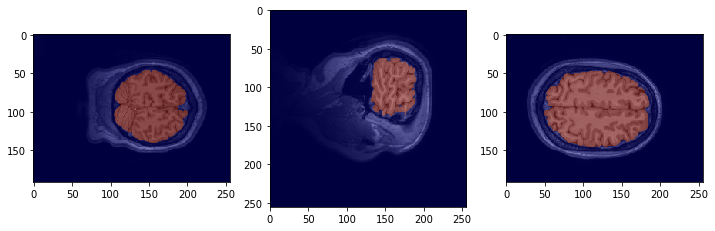

In [169]:
# plt.imshow(mask.get_fdata()[:,:,60])
np.max(mask.get_fdata()[:,50,:])
# np.ma.masked_where(mask.get_fdata(), )



# masked = np.ma.masked_where(mask.get_fdata()[:,50,:] == 1, mask.get_fdata()[:,50,:])

plt.figure(figsize=(12, 12))
plt.subplot(1,3,1)
plt.imshow(data.get_fdata()[:,50,:], 'gray', interpolation='none')
plt.imshow(mask.get_fdata()[:,50,:], 'jet', alpha=0.5, interpolation='none')
plt.subplot(1,3,2)
plt.imshow(data.get_fdata()[40,:,:], 'gray', interpolation='none')
plt.imshow(mask.get_fdata()[40,:,:], 'jet', alpha=0.5, interpolation='none')
plt.subplot(1,3,3)
plt.imshow(data.get_fdata()[:,:,200], 'gray', interpolation='none')
plt.imshow(mask.get_fdata()[:,:,200], 'jet', alpha=0.5, interpolation='none')
# plt.imshow(masked, cmap='jet', alpha=0.7, interpolation='none')
plt.show()

Try slicing different dimensions (x,y,z) yourself to get a feel for how the data is represented in this anatomical image.

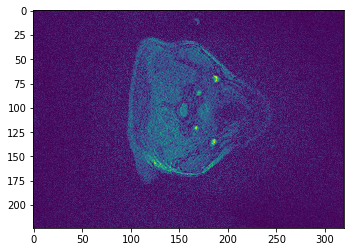

In [69]:
plt.imshow(data.get_fdata()[:,:,1])

We can also access data from the image header. Let's assign the header of an image to a variable and print it to view it's contents.

In [9]:
header = data.header
print(header)      

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 157 189 136   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  0.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Mar  1 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -50.0
srow_x          : 

Some of the important information in the header is information about the orientation of the image in space. This can be represented as the affine matrix.

## Nilearn
There are many useful tools from the [nilearn](https://nilearn.github.io/index.html) library to help manipulate and visualize neuroimaging data. See their [documentation](https://nilearn.github.io/plotting/index.html#different-plotting-functions) for an example.

Let's make sure it is installed first.

In [18]:
!pip install nilearn

Now let's load a few different plotting functions from their plotting module

In [19]:
%matplotlib inline

from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi

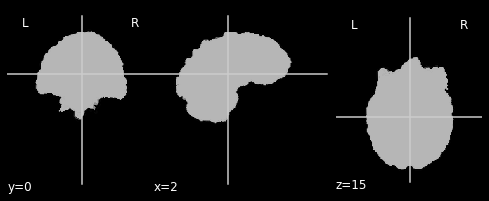

In [112]:
plot_anat(data)

Nilearn plotting functions are very flexible and allow us to easily customize our plots

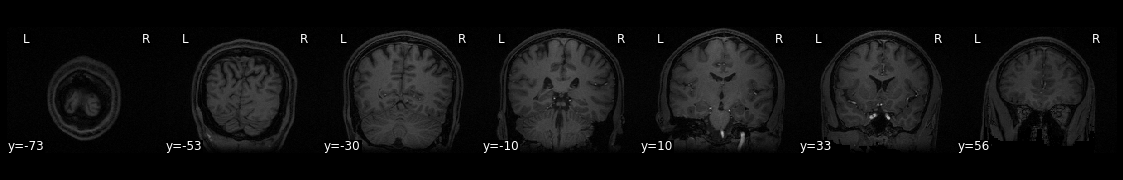

In [23]:
plot_anat(data, draw_cross=False, display_mode='y')

try to get more information how to use the function with `?` and try to add different commands to change the plot

nilearn also has a neat interactive viewer called `view_img` for examining images directly in the notebook. 

/Users/tom/opt/anaconda3/lib/python3.7/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



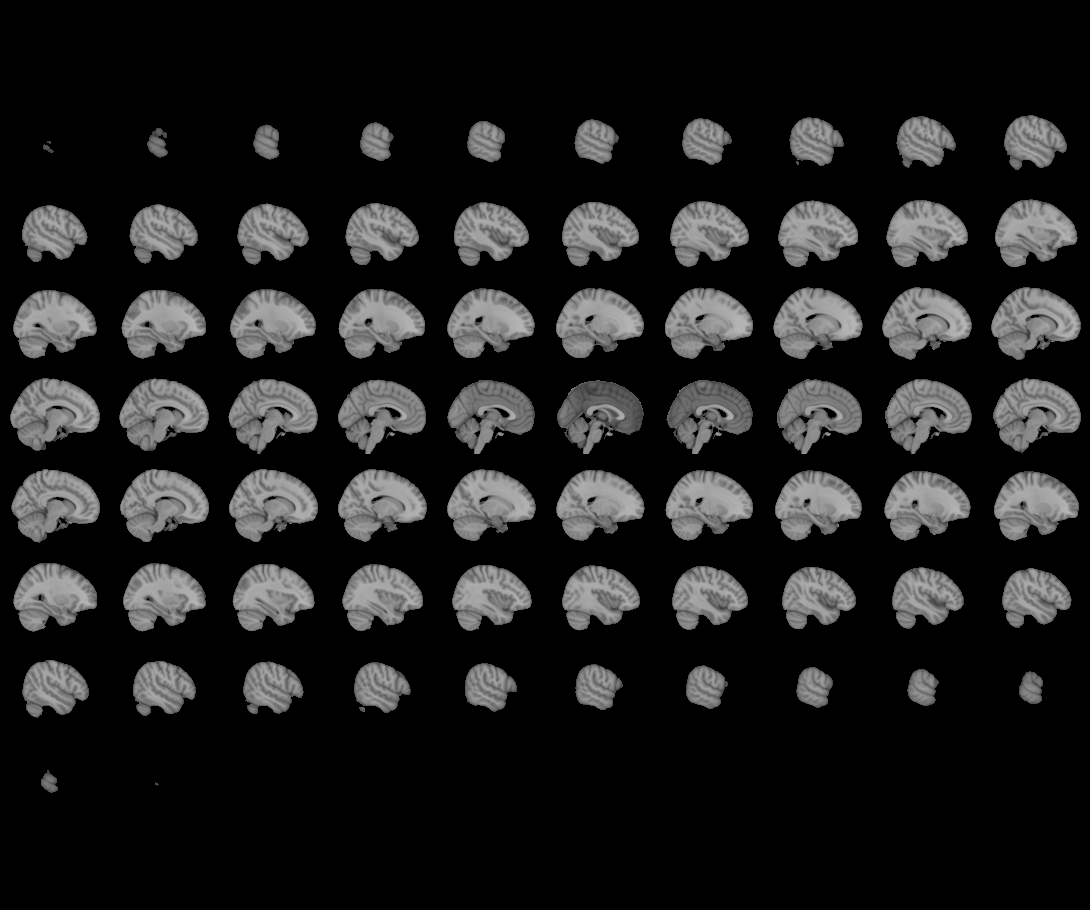
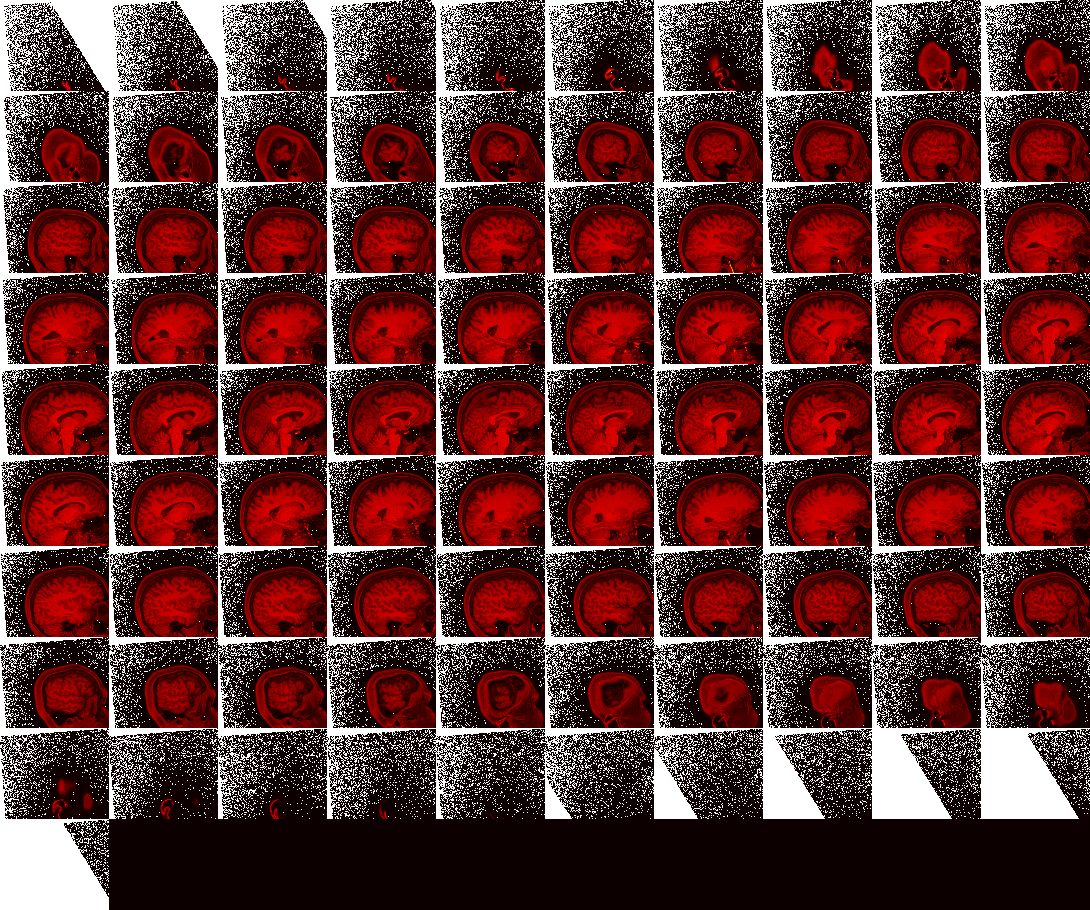

In [71]:
view_img(data)

We can also load 4D data such as a series of epi images.  Here we will load a short functional run from the same particiapnts.

In [61]:
# epi = nib.load('./raw_bold_example.nii.gz')
epi = nib.load('./babyface_bold.nii.gz')
print(epi.shape)

(64, 64, 36, 136)


For some reason nibabel is reading this nifti as a 5D image.  Let's quickly remove the extra dimension.

In [62]:
epi_data = epi.get_fdata()
epi_data = epi_data.squeeze()
print(epi_data.shape)

(64, 64, 36, 136)


### Ok, looks like this fixed the dimensions.

Now, let's plot the average voxel signal intensity across the whole brain for each of the 136 TRs.

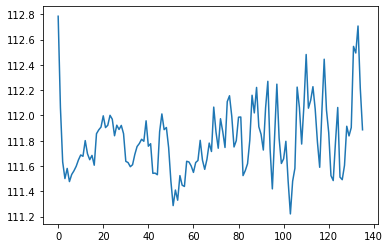

In [73]:
import numpy as np
plt.plot(np.mean(epi_data,axis=(0,1,2)))
# plt.plot(np.mean(epi_data,axis=(0,1,2)))

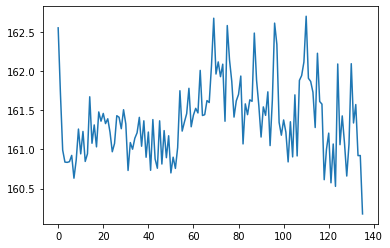

In [75]:
slice = epi_data[:,:,20,:]
slice.shape
plt.plot(np.mean(slice,axis=(0,1)))

Notice the slow linear drift over time, where the global signal intensity gradually decreases.

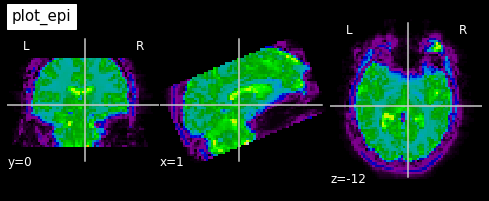

In [105]:
from nilearn import image

# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D

mean_epi = image.mean_img(epi)

# mean_haxby_img = image.mean_img('./babyface_bold.nii.gz')

# Visualizing mean image (3D)
# plot_epi(mean_epi, title="plot_epi", draw_cross=True)

plot_epi(mean_epi, title="plot_epi")
# plot_epi(mean_epi, title="plot_epi", cut_coords=((5,5,10)))
# plot_epi(mean_epi, title="plot_epi", cut_coords=((5,5,10)))

